In [1]:
import os
import socket
import utils
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

DATA_DIR = {
    3 : "/mnt/server5/sdi/datasets",
    4 : "/mnt/server5/sdi/datasets",
    5 : "/data1/sdi/datasets"
}

def get_datadir():
    if socket.gethostname() == "server3":
        return DATA_DIR[3]
    elif socket.gethostname() == "server4":
        return DATA_DIR[4]
    elif socket.gethostname() == "server5":
        return DATA_DIR[5]
    else:
        raise NotImplementedError

datadir = os.path.join(get_datadir(), 'CPN/Images')
maskdir = os.path.join(get_datadir(), 'CPN/Masks')

/home/sdi/anaconda3/envs/sdi_CPNKDv5/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FH_I0031204.jpg 		width 367 cls: 269


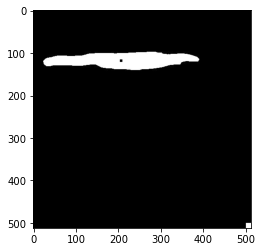

In [31]:
clslst = [0 for i in range(1024)]
for fname in os.listdir(maskdir):
    ma = os.path.join(maskdir, fname)

    if not os.path.exists(ma):
        raise Exception ( "File not exists", ma )
    
    mask = np.array( Image.open(ma).convert("L"), dtype=np.uint8 )

    h, w = np.where(mask > 0)
    tl = (h.min(), w.min())
    rb = (h.max(), w.max())
    pnt = ( int((tl[0] + rb[0])/2), int((tl[1] + rb[1])/2) )
    
    clsn = 32 * ((pnt[0] // 16) + 1) + ((pnt[1] // 16) + 1)
    clslst[clsn - 1] += 1
    mask[500:512,500:512] = 255
    mask[pnt[0]-3: pnt[0]+3, pnt[1]-3: pnt[1]+3] = 0

    if rb[0] - tl[0] > 256:
        print(fname, "\t\theight:", rb[0] - tl[0], "cls:", clsn)

    if rb[1] - tl[1] > 256:
        print(fname, "\t\twidth", rb[1] - tl[1], "cls:", clsn)
        plt.imshow(mask, cmap='gray')
        break
    

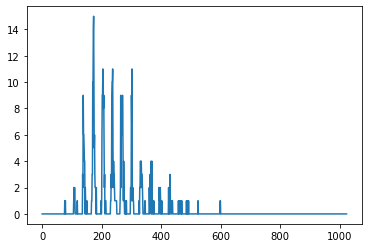

In [26]:
plt.plot(clslst)

In [24]:
sum(clslst)

490